# Chest X-ray COVID Classification

## Task 1: Meme Competition

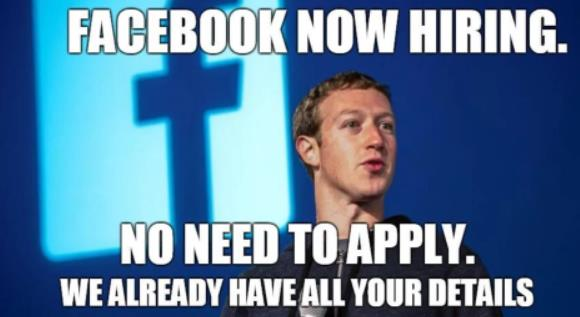

## Task2 :  Understand the template

In [54]:
from tqdm.notebook import tqdm  # import tqdm for creating progress bar of loading the images
from PIL import Image # import Image
import pandas as pd # import pandas
import os # import os for filesystem operation
import numpy as np # import numpy


In [55]:
from google.colab import drive # connet to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# define the data loader
def load_data(folder):
    images = [] # initializing a list
    for file in tqdm(os.listdir(folder)):# iterate through all image files
        file_id = file.replace('.png', '')# stripping file extension to unique identy of each sample
        image = Image.open(
            os.path.join(folder, file) # load each image from the path
        ).convert('LA').resize((256, 256)) # 'LA' means convert to grayscale and resize to 256 by 256
        arr = np.array(image) # initialize an array object containing this one image
        images.append(
            (int(file_id), arr) # append ID and image data (ID, data)
        )
    images.sort(key=lambda i: i[0]) # sort the input samples
    return np.array([v for _id, v in images])  # return each image data as an array



x_train = load_data('/content/drive/MyDrive/a3/train') # load training data 
y_train = pd.read_csv('/content/drive/MyDrive/a3/y_train.csv')['infection']  # load training label

  0%|          | 0/487 [00:00<?, ?it/s]

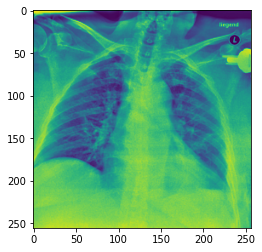

In [57]:
# check image 
import matplotlib.pyplot as plt # import pyplot
plt.imshow(x_train[0, :, :, 0]) # check the first sample

In [58]:
import tensorflow as tf # import tensorflow
from tensorflow.keras.models import Sequential # # import Sequential for defining models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input # import differrent type layers


#config model
def build():
    img_in = Input(shape=(256, 256, 2)) # the shape of the input images is 256x256x2 
    flattened = Flatten()(img_in) # flattening the sample into a 1D shape #131072
    fc1 = Dense(64)(flattened)# dense layer of 64 neurons
    #fc1 = Dropout(0.3)(fc1) # dropout layer with a probability of 30%,
    fc2 = Dense(32)(fc1) # dense layer of 32 neurons
    #fc2 = Dropout(0.3)(fc2) # dropout layer with a probability of 30%,
    output = Dense(1, activation = 'sigmoid')(fc2) # output layer with sigmoid activation
    model = tf.keras.Model(inputs=img_in, outputs=output) # assigning the model
    return model


model = build() # define the model
model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) # config the traning with optimizers, loss function, and evaluation metrics

model.summary() # display the model structure


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256, 256, 2)]     0         
                                                                 
 flatten_14 (Flatten)        (None, 131072)            0         
                                                                 
 dense_30 (Dense)            (None, 64)                8388672   
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________


In [59]:
epochs = 30 # the number of traning iterations
batch_size = 64  # number of training samples read into the memory each time

history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = batch_size,
                    validation_split=0.3,
                    epochs=30
                    ) # fit in the data with the hyperprameter defined above

Epoch 1/30
6/6 [==============================] - 1s 63ms/step - loss: 60444.3516 - binary_accuracy: 0.5176 - auc: 0.4827 - val_loss: 69410.9531 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 2/30
6/6 [==============================] - 0s 12ms/step - loss: 33862.6836 - binary_accuracy: 0.6853 - auc: 0.5587 - val_loss: 50622.0000 - val_binary_accuracy: 0.3469 - val_auc: 0.5000
Epoch 3/30
6/6 [==============================] - 0s 12ms/step - loss: 28516.4609 - binary_accuracy: 0.4882 - auc: 0.5126 - val_loss: 39447.8086 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 4/30
6/6 [==============================] - 0s 12ms/step - loss: 28697.4648 - binary_accuracy: 0.6765 - auc: 0.5000 - val_loss: 891.4657 - val_binary_accuracy: 0.6599 - val_auc: 0.6247
Epoch 5/30
6/6 [==============================] - 0s 12ms/step - loss: 12365.1201 - binary_accuracy: 0.3824 - auc: 0.4913 - val_loss: 5149.6211 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 6/30
6/6 [======================

In [60]:
x_test = load_data('/content/drive/MyDrive/a3/test') # loading the testing data

y_test = model.predict(x_test) # make the predictions

y_test_df = pd.DataFrame() # initialize empty DataFrame
y_test_df['id'] = np.arange(len(y_test)) # assigning IDs 
y_test_df['infection'] = y_test.astype(float) # convert the predictions into floats type
y_test_df.to_csv('submission.csv', index=False) # create csv



  0%|          | 0/210 [00:00<?, ?it/s]

7/7 [==============================] - 0s 3ms/step


## Task3: Problem Formulation

**Define the problem. What is the input? What is the output?What data mining function is required?**

The following is the experimental protocol:

It first defines a dataloader pipeline to load training samples one-by-one, convert them to greyscale, and sort them by id in a numpy array with dimensions 256x256x2.

The second step involves building a model that takes a 256x256x2 image, flattens it into 1D, and then passes it to dense layers with 64 and 32 units, respectively. One neuron in the output layer that exhibits sigmoid activation produces the prediction.

In terms of training, a batch size of 64 and a split of 30% are used to fit the model to the training data across 30 epochs .

Finally, predictions utilizing the test dataset.

**What could be the challenges? What is the impact? What is an ideal solution?**

i believe the challenges part would be fine tuning the model. fine tuning can significantly boost the performace of the model.
the ideal solution is that we need firstly undstand the dimensions of each layers of the model in order to modify the arthecture of . secondly,we need to tuning the hyperparameter base on the observationof traning and validation accuracy.

## Task4 Tuning

### Trial 1 fully-connected neural network models 

by observing the training and validation accuracy of the first model, we can see there is a significant overfiting issue. I plan to add two dropout layers to overcome the issue. it looks like the peformace of the model has slightly improved

#### ANN 1

In [61]:
import tensorflow as tf # import tensorflow
from tensorflow.keras.models import Sequential # # import Sequential for defining models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input # import differrent type layers

In [62]:
#config model
def build2():
    img_in = Input(shape=(256, 256, 2)) # the shape of the input images is 256x256x2 
    flattened = Flatten()(img_in) # flattening the input for each sample into a 1D shape 256x256x2 = 131072 
    fc1 = Dense(64)(flattened)  # dense layer of 64 neurons
    fc1 = Dropout(0.3)(fc1)  # dropout layer with a probability of 30%,
    fc2 = Dense(32)(fc1) # dense layer of 32 neurons
    fc2 = Dropout(0.3)(fc2) # dropout layer with a probability of 30%,
    output = Dense(1, activation = 'sigmoid')(fc2) # output layer with sigmoid activation
    model = tf.keras.Model(inputs=img_in, outputs=output) # assigning the model
    return model


model2 = build2() # define the model
model2.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) # config the traning with optimizers, loss function, and evaluation metrics

model2.summary() # display the model structure

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 256, 256, 2)]     0         
                                                                 
 flatten_15 (Flatten)        (None, 131072)            0         
                                                                 
 dense_33 (Dense)            (None, 64)                8388672   
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 33  

In [104]:
epochs = 30 # the number of traning iterations
batch_size = 64  # number of training samples read into the memory each time

history = model2.fit(x = x_train,
                    y = y_train,
                    batch_size = 128,
                    validation_split=0.3,
                    epochs=30
                    ) # fit in the data with the hyperprameter defined above

Epoch 1/30
3/3 [==============================] - 0s 43ms/step - loss: 2361.0361 - binary_accuracy: 0.6765 - auc: 0.6152 - val_loss: 1464.0189 - val_binary_accuracy: 0.6259 - val_auc: 0.6676
Epoch 2/30
3/3 [==============================] - 0s 23ms/step - loss: 2357.8286 - binary_accuracy: 0.6735 - auc: 0.6449 - val_loss: 2246.4888 - val_binary_accuracy: 0.7075 - val_auc: 0.5830
Epoch 3/30
3/3 [==============================] - 0s 23ms/step - loss: 2802.8118 - binary_accuracy: 0.6824 - auc: 0.6206 - val_loss: 1208.8118 - val_binary_accuracy: 0.6531 - val_auc: 0.6654
Epoch 4/30
3/3 [==============================] - 0s 24ms/step - loss: 2869.4783 - binary_accuracy: 0.6824 - auc: 0.6443 - val_loss: 2009.9009 - val_binary_accuracy: 0.7143 - val_auc: 0.5974
Epoch 5/30
3/3 [==============================] - 0s 23ms/step - loss: 3084.8118 - binary_accuracy: 0.6824 - auc: 0.6466 - val_loss: 1178.2791 - val_binary_accuracy: 0.7347 - val_auc: 0.6728
Epoch 6/30
3/3 [=============================

#### ANN 2

from the traning the second model we can see, the overfiting issue has been overcomed, then i plan to add activation function. 

In [64]:
#config model
def build3():
    img_in = Input(shape=(256, 256, 2)) # shape of our input images, 256x256x2 
    flattened = Flatten()(img_in) # flattening the input image into a 1D shape (131072)
    fc1 = Dense(64,activation='relu')(flattened) # dense layer of 64 neurons 
    fc1 = Dropout(0.3)(fc1) # dropout layer with a probability of 30%
    fc2 = Dense(32,activation='relu')(fc1) # dense layer of 32 neurons
    fc2 = Dropout(0.3)(fc2) # dropout layer with a probability of 30%
    output = Dense(1, activation = 'sigmoid')(fc2) # output layer used to make predictions
    model = tf.keras.Model(inputs=img_in, outputs=output) # assigning the model
    return model


model3 = build2() # assigning the model
model3.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) # config the traning with optimizers, loss function, and evaluation metrics

model3.summary() # summary the model structure

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 256, 256, 2)]     0         
                                                                 
 flatten_16 (Flatten)        (None, 131072)            0         
                                                                 
 dense_36 (Dense)            (None, 64)                8388672   
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 33  

In [103]:
epochs = 30 # the number of traning iterations
batch_size = 64  # number of training samples read into the memory each time

history = model3.fit(x = x_train,
                    y = y_train,
                    batch_size = 128,
                    validation_split=0.3,
                    epochs=30
                    ) # fit in the data with the hyperprameter defined above

Epoch 1/30
3/3 [==============================] - 0s 44ms/step - loss: 2749.5659 - binary_accuracy: 0.6471 - auc: 0.6134 - val_loss: 1855.3260 - val_binary_accuracy: 0.7483 - val_auc: 0.6556
Epoch 2/30
3/3 [==============================] - 0s 24ms/step - loss: 2917.5015 - binary_accuracy: 0.7029 - auc: 0.5907 - val_loss: 2562.4885 - val_binary_accuracy: 0.5442 - val_auc: 0.6189
Epoch 3/30
3/3 [==============================] - 0s 24ms/step - loss: 3157.3628 - binary_accuracy: 0.6294 - auc: 0.6360 - val_loss: 1957.5021 - val_binary_accuracy: 0.7279 - val_auc: 0.6262
Epoch 4/30
3/3 [==============================] - 0s 23ms/step - loss: 2385.2305 - binary_accuracy: 0.6882 - auc: 0.6391 - val_loss: 1317.5083 - val_binary_accuracy: 0.6939 - val_auc: 0.6967
Epoch 5/30
3/3 [==============================] - 0s 23ms/step - loss: 2237.7563 - binary_accuracy: 0.6912 - auc: 0.6318 - val_loss: 1469.5258 - val_binary_accuracy: 0.7483 - val_auc: 0.6786
Epoch 6/30
3/3 [=============================

it seem like the activation isn't help improve that much. 

### Trial 2 fully-connected model with Data augmentation 

in this trail, I plan to add data augmentation layers to the model, before the flatten layer. it looks like the performace has a significant improvement 

#### ANN3

In [105]:
# import dependencies for data augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, Rescaling

# define data augmentation
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),# RandomFlip
  RandomRotation(0.2), # random rotation 
  Rescaling(1/255), # Rescaling
])

#config model
model9 = tf.keras.Sequential([
  Input(shape=(256, 256, 2)),# shape of our input images, 256x256x2 
  data_augmentation,#data_augmentation  layer
  Flatten(),# flattening the input image into a 1D shape (131072)
  Dense(64), # dense layer of 64 neurons
  Dense(32),# dense layer of 32 neurons
  Dense(1, activation='sigmoid') # output layer used to make prediction
])

# config the traning with optimizers, loss function, and evaluation metrics
model9.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) 

model9.summary() # summary the model

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_41 (Sequential)  (None, 256, 256, 2)       0         
                                                                 
 flatten_36 (Flatten)        (None, 131072)            0         
                                                                 
 dense_74 (Dense)            (None, 64)                8388672   
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dense_76 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model9.fit(x_train, y_train, validation_split=0.3, epochs = 30, batch_size = 64) # fit in the data with the hyperprameter defined above

Epoch 1/30
6/6 [==============================] - 2s 89ms/step - loss: 267.8991 - binary_accuracy: 0.5353 - auc: 0.4790 - val_loss: 159.0423 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 2/30
6/6 [==============================] - 0s 38ms/step - loss: 105.1186 - binary_accuracy: 0.5353 - auc: 0.5142 - val_loss: 38.1058 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 3/30
6/6 [==============================] - 0s 39ms/step - loss: 75.3214 - binary_accuracy: 0.6765 - auc: 0.5000 - val_loss: 9.8903 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 4/30
6/6 [==============================] - 0s 39ms/step - loss: 54.9462 - binary_accuracy: 0.4441 - auc: 0.5303 - val_loss: 82.0304 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 5/30
6/6 [==============================] - 0s 38ms/step - loss: 83.7323 - binary_accuracy: 0.6765 - auc: 0.5000 - val_loss: 40.5897 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 6/30
6/6 [==============================] - 0s 40ms/step 

### Trial 3 convolution neural network

#### CNN1

in this trail, I plan to swtich to convolution neural network see if it can have a btter performace

In [70]:
from tensorflow.keras.layers import MaxPooling2D #import MaxPooling2D


#define the CNN model
cnn_model = Sequential([
  Input(shape=(256, 256, 2)), # imput layer
  Conv2D(30, (5, 5), activation='relu'), # 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)), #maxpooling layer
  Conv2D(15, (3, 3), activation='relu'),# 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)),#maxpooling layer
  Flatten(), # flatten into 1D shape
  Dense(200, activation='relu'), # dense layer witgh 500 units and relu activation
  Dropout(0.3), # dropout layer with probability of 50%
  Dense(1, activation='sigmoid') # dense layer with 1 neuren and sigmoid activation
])



# config the traning with optimizers, loss function, and evaluation metrics
cnn_model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) 

cnn_model.summary() # summary the model

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 252, 252, 30)      1530      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 126, 126, 30)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 124, 124, 15)      4065      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 15)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 57660)             0         
                                                                 
 dense_48 (Dense)            (None, 200)             

In [71]:
history = cnn_model.fit(x_train, y_train, validation_split=0.3, epochs = 30, batch_size = 64) # fit in the data with the hyperprameter defined above

Epoch 1/30
6/6 [==============================] - 1s 79ms/step - loss: 579.1674 - binary_accuracy: 0.5735 - auc: 0.4985 - val_loss: 34.0213 - val_binary_accuracy: 0.6395 - val_auc: 0.5037
Epoch 2/30
6/6 [==============================] - 0s 25ms/step - loss: 19.0709 - binary_accuracy: 0.5353 - auc: 0.4950 - val_loss: 6.3828 - val_binary_accuracy: 0.6395 - val_auc: 0.5468
Epoch 3/30
6/6 [==============================] - 0s 24ms/step - loss: 3.4455 - binary_accuracy: 0.6324 - auc: 0.4842 - val_loss: 1.0534 - val_binary_accuracy: 0.5510 - val_auc: 0.5893
Epoch 4/30
6/6 [==============================] - 0s 25ms/step - loss: 0.8426 - binary_accuracy: 0.6471 - auc: 0.5768 - val_loss: 0.6875 - val_binary_accuracy: 0.6667 - val_auc: 0.5831
Epoch 5/30
6/6 [==============================] - 0s 24ms/step - loss: 0.6667 - binary_accuracy: 0.6912 - auc: 0.5830 - val_loss: 0.7021 - val_binary_accuracy: 0.6599 - val_auc: 0.5434
Epoch 6/30
6/6 [==============================] - 0s 24ms/step - loss: 

#### CNN2

in this trial, I plan to add data augmentation layers see if it can improve the eobustness or performace of the model. it looks like the peformace of the model has slightly improved

In [72]:
from tensorflow.keras.layers import MaxPooling2D # import MaxPooling2D

# import dependencies for data augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, Rescaling

# define data augmentation
data_augmentation = tf.keras.Sequential([
  Rescaling(1/255), # Rescaling
  RandomFlip("horizontal_and_vertical"),# RandomFlip
  RandomRotation(0.2), # random rotation 
])

#define the CNN model
cnn_model2 = Sequential([
  Input(shape=(256, 256, 2)), # imput layer
  data_augmentation,# data augmentation layer
  Conv2D(30, (5, 5), activation='relu'), # 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)), #maxpooling layer
  Conv2D(15, (3, 3), activation='relu'),# 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)),#maxpooling layer
  Flatten(), # flatten into 1D shape
  Dense(500, activation='relu'), # dense layer witgh 500 units and relu activation
  Dropout(0.5), # dropout layer with probability of 50%
  Dense(1, activation='sigmoid') # dense layer with 1 neuren and sigmoid activation
])


# config the traning with optimizers, loss function, and evaluation metrics
cnn_model2.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) 
cnn_model2.summary() # summary the model

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_20 (Sequential)  (None, 256, 256, 2)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 252, 252, 30)      1530      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 126, 126, 30)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 124, 124, 15)      4065      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 62, 62, 15)       0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 57660)           

In [73]:
history = cnn_model2.fit(x_train, y_train, validation_split=0.3, epochs = 30, batch_size = 64) # fit in the data with the hyperprameter defined above

Epoch 1/30
6/6 [==============================] - 2s 108ms/step - loss: 6.1979 - binary_accuracy: 0.5176 - auc: 0.5098 - val_loss: 0.7342 - val_binary_accuracy: 0.6531 - val_auc: 0.3997
Epoch 2/30
6/6 [==============================] - 0s 54ms/step - loss: 1.1488 - binary_accuracy: 0.6735 - auc: 0.5447 - val_loss: 0.7235 - val_binary_accuracy: 0.6531 - val_auc: 0.3745
Epoch 3/30
6/6 [==============================] - 0s 53ms/step - loss: 0.7152 - binary_accuracy: 0.5353 - auc: 0.5061 - val_loss: 0.6695 - val_binary_accuracy: 0.6531 - val_auc: 0.3549
Epoch 4/30
6/6 [==============================] - 0s 52ms/step - loss: 0.6570 - binary_accuracy: 0.6765 - auc: 0.4509 - val_loss: 0.6579 - val_binary_accuracy: 0.6531 - val_auc: 0.4258
Epoch 5/30
6/6 [==============================] - 0s 53ms/step - loss: 0.6463 - binary_accuracy: 0.6765 - auc: 0.4955 - val_loss: 0.6514 - val_binary_accuracy: 0.6531 - val_auc: 0.3995
Epoch 6/30
6/6 [==============================] - 0s 52ms/step - loss: 0.6

#### CNN3

this trial, i try to add padding strategy when doing convlutions since the size of the input of image is small. padding will help the kennel scaning the area that close to the edge of the image. it looks like the model has significantly improved

In [79]:
from tensorflow.keras.layers import MaxPooling2D # import MaxPooling2D

# import dependencies for data augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, Rescaling

# define data augmentation
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),# RandomFlip
  RandomRotation(0.2), # random rotation 
  Rescaling(1/255), # Rescaling
])

#define the CNN model
cnn_model7 = Sequential([
  Input(shape=(256, 256, 2)), # imput layer
  data_augmentation,# data augmentation layer
  Conv2D(30, (5, 5),padding='same', activation='relu'), # 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)), #maxpooling layer
  Conv2D(15, (3, 3),padding='same', activation='relu'),# 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)),#maxpooling layer
  Flatten(), # flatten into 1D shape
  Dense(500, activation='relu'), # dense layer witgh 500 units and relu activation
  Dropout(0.5), # dropout layer with probability of 50%
  Dense(1, activation='sigmoid') # dense layer with 1 neuren and sigmoid activation
])

# config the traning with optimizers, loss function, and evaluation metrics
cnn_model7.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0002),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) 

cnn_model7.summary() # summary the model

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_28 (Sequential)  (None, 256, 256, 2)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 256, 256, 30)      1530      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 128, 128, 30)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 128, 128, 15)      4065      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 64, 64, 15)       0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 61440)           

In [80]:
history = cnn_model7.fit(x_train, y_train, validation_split=0.3, epochs = 50, batch_size = 64) # fit in the data with the hyperprameter defined above

Epoch 1/50
6/6 [==============================] - 2s 111ms/step - loss: 1.6203 - binary_accuracy: 0.5588 - auc: 0.5177 - val_loss: 0.6866 - val_binary_accuracy: 0.6395 - val_auc: 0.4792
Epoch 2/50
6/6 [==============================] - 0s 55ms/step - loss: 0.6937 - binary_accuracy: 0.6176 - auc: 0.4858 - val_loss: 0.6757 - val_binary_accuracy: 0.6531 - val_auc: 0.4741
Epoch 3/50
6/6 [==============================] - 0s 55ms/step - loss: 0.6824 - binary_accuracy: 0.6588 - auc: 0.4658 - val_loss: 0.6463 - val_binary_accuracy: 0.6531 - val_auc: 0.4955
Epoch 4/50
6/6 [==============================] - 0s 55ms/step - loss: 0.6346 - binary_accuracy: 0.6853 - auc: 0.5504 - val_loss: 0.6428 - val_binary_accuracy: 0.6531 - val_auc: 0.5393
Epoch 5/50
6/6 [==============================] - 0s 55ms/step - loss: 0.6391 - binary_accuracy: 0.6529 - auc: 0.5622 - val_loss: 0.6377 - val_binary_accuracy: 0.6531 - val_auc: 0.5957
Epoch 6/50
6/6 [==============================] - 0s 53ms/step - loss: 0.6

#### CNN 4

in this trail, I'm trying to use ImageDataGenerator to create more data for fiting the model ( i encounter a problem with validation_split function from single dataset path. but finally fixed it)

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # import ImageDataGenerator

In [82]:
# use ImageDataGenerator to create more data
image_gen = ImageDataGenerator(
                               validation_split=0.3, # split the dataset
                               rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                              #  rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [83]:
image_gen.fit(x_train) # fit in the training data

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1882: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (487, 256, 256, 2) (2 channels).
  ' channels).')


In [84]:
train_generator = image_gen.flow(x_train,y_train,batch_size=64, subset='training') # create train_generator
valid_generator = image_gen.flow(x_train,y_train,batch_size=64, subset='validation') # valid_generator

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:687: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (341, 256, 256, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:687: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (146, 256, 256, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


In [108]:
# define cnn model
cnn_model3 = Sequential([
  Input(shape=(256, 256, 2)), # imput layer
  Rescaling(1/255),
  Conv2D(30, (5, 5),padding='same',activation='relu'), # 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)), #maxpooling layer
  Conv2D(15, (3, 3), padding='same',activation='relu'),# 2D conv layer with 5 by 5 kennel  and relu activation
  MaxPooling2D(pool_size=(2, 2)),#maxpooling layer
  Flatten(), # flatten into 1D shape
  Dense(200, activation='relu'), # dense layer witgh 500 units and relu activation
  Dropout(0.3), # dropout layer with probability of 50%
  Dense(1, activation='sigmoid') # dense layer with 1 neuren and sigmoid activation
])

#compile the model
cnn_model3.compile(
        optimizer=tf.keras.optimizers.Adam(lr = 0.0005),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        ) # config the traning with optimizers, loss function, and evaluation metrics

cnn_model3.summary() # summary the model

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_29 (Rescaling)    (None, 256, 256, 2)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 256, 256, 30)      1530      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 128, 128, 30)     0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 128, 128, 15)      4065      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 64, 64, 15)       0         
 g2D)                                                            
                                                                 
 flatten_37 (Flatten)        (None, 61440)           

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [109]:
# config the traning process
cnn_model3.fit(image_gen.flow(x_train, y_train, batch_size=64,
         subset='training'),
         validation_data=image_gen.flow(x_train, y_train,
         batch_size=64, subset='validation'),
          epochs=30)

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:687: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (341, 256, 256, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:687: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (146, 256, 256, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/30
6/6 [==============================] - 6s 867ms/step - loss: 2.4693 - binary_accuracy: 0.5132 - auc: 0.5064 - val_loss: 0.6402 - val_binary_accuracy: 0.7055 - val_auc: 0.4682
Epoch 2/30
6/6 [==============================] - 4s 713ms/step - loss: 0.8128 - binary_accuracy: 0.6540 - auc: 0.5075 - val_loss: 0.6314 - val_binary_accuracy: 0.7055 - val_auc: 0.4659
Epoch 3/30
6/6 [==============================] - 4s 712ms/step - loss: 0.6740 - binary_accuracy: 0.5982 - auc: 0.5376 - val_loss: 0.6440 - val_binary_accuracy: 0.7055 - val_auc: 0.5501
Epoch 4/30
6/6 [==============================] - 4s 710ms/step - loss: 0.6635 - binary_accuracy: 0.6452 - auc: 0.4637 - val_loss: 0.6121 - val_binary_accuracy: 0.7055 - val_auc: 0.4795
Epoch 5/30
6/6 [==============================] - 4s 710ms/step - loss: 0.6544 - binary_accuracy: 0.6540 - auc: 0.4686 - val_loss: 0.6406 - val_binary_accuracy: 0.7055 - val_auc: 0.5911
Epoch 6/30
6/6 [==============================] - 4s 715ms/step - loss

### prepare csv for submision

In [87]:
x_test = load_data('/content/drive/MyDrive/a3/test') # loading the testing data

y_test = cnn_model7.predict(x_test) # make the predictions

y_test_df = pd.DataFrame() # initialize empty DataFrame
y_test_df['id'] = np.arange(len(y_test)) # assigning IDs 
y_test_df['infection'] = y_test.astype(float) # convert the predictions into floats type
y_test_df.to_csv('submission.csv', index=False) # create csv


  0%|          | 0/210 [00:00<?, ?it/s]

7/7 [==============================] - 0s 5ms/step


In [88]:
# from google.colab import files
# files.download("submission.csv") #download the csv

# Task 5: Questions

**What is the validation method used in the example template? Considering the dataset is a bit small, is it an appropriate approach? If not, what would you suggest?**

the template's validation approach is a simple hold-out of 30% of the training data for validation and is evaluated while training. Considering the dataset is a bit small, we could use ImageDataGenerator to generate more data by augment the original data or use K-Fold Cross Validation to overcome the small dataset issue.

**What is the default model in the template? Is it a good one for image data? why?**

The template's default model is a fully-connected neural network. Fully connected neural networks are not suitable for image data since they are incapable of extracting high-level features from the image.

**Convolution neural network address what issues of a fully connected neural network and how?**

When utilising a fully connected neural network to classify an image, the 2D information must be flattened into 1D data. The spatial information has been lost as a result of the transformation. CNN, on the other hand, can better extract spatial features from image data since it applies a kennel scanning approach.

The trained CNN model may have better robustness and noise tolerance to perform classification tasks on varied types or sizes of picture data. The trained ANN classifier, on the other hand, can only apply to the same type of image data.

**What's the different between 1d, 2d, and 3d convolution?**


In 1D convolution, the filters only move in one way, from left to right.This is typically used for Signal smoothing, sentence classification.



The filters in 2D convolution travel in two directions: 1) left to right and 2) top to bottom.This is often utilised in image classification, generating new images, image inpainting, image colorization.



The filters in 3D convolution move in three directions. 1) from left to right; 2) from top to bottom; and 3) from front to rear. This is typical in deep learning applications when three-dimensional models/images with considerable depth.

**What is the difference between convolution and pooling?**

the convolutional layer detects (multiple) patterns in different sub-regions of the input field.

The pooling layer reduces the spatial size of the representation, the number of parameters and the amount of computing in the network, and hence controls overfitting.

A simple convolutional neural network is composed of convolution layers and pooling layers. When the image passes through them, the essential features are retained in the convolution layers, and the pooling layers intensify these features while discarding all irrelevant information.


# Task 6 submit the csv to the leaderboards

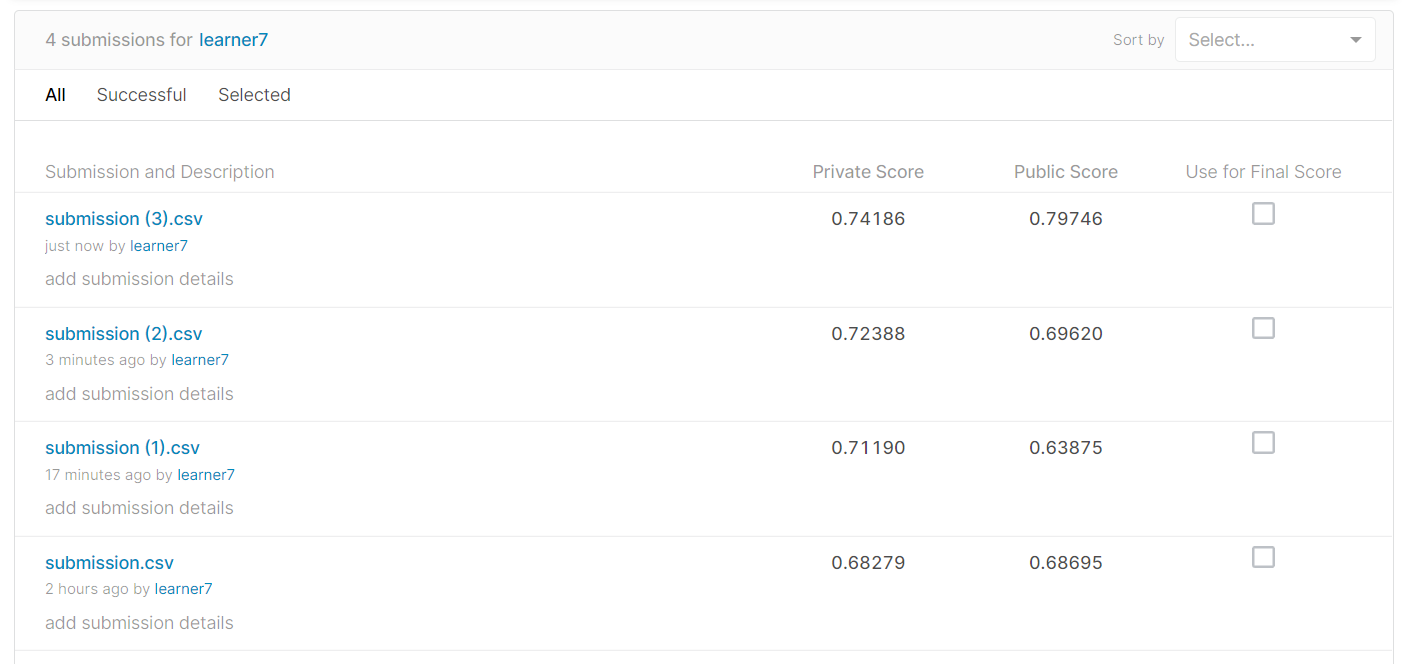